# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [51]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv" #generic starter code
study_results_path = "data/Study_results.csv"#generic starter code

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)#generic starter code
study_results = pd.read_csv(study_results_path)#generic starter code

# Combine the data into a single DataFrame
combine_data = pd.merge(study_results,mouse_metadata, on="Mouse ID")
# Display the data table for preview
combine_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(combine_data["Mouse ID"].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
#Site help with the getting the duplication (Return boolean Series denoting duplicate rows.)  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html
duplicate = combine_data[combine_data.duplicated(subset=["Mouse ID","Timepoint"])]["Mouse ID"].unique()
duplicate


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
#duplicate_data = combine_data[combine_data.duplicated(subset=["Mouse ID","Timepoint"], keep=False)]
duplicate_data = combine_data[combine_data["Mouse ID"]=="g989"]
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#combine_data_clean = combine_data.drop_duplicates(subset=["Mouse ID","Timepoint"],keep="first") not use because ask to drop by ID and 
#starter code indicate the 248 unique ID, meaning this is ask to drop all g989
combine_data_clean = combine_data.loc[(combine_data["Mouse ID"] != "g989"),:]
combine_data_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
# 249 is the number of unique mice with out having a duplicate from g989, 
# 248 in the starter code is dataframe with out g989 at all 
len(combine_data_clean["Mouse ID"].unique())


248

## Summary Statistics

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
statement = combine_data_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"]
mean = statement.mean()
median = statement.median()
variance = statement.var()
standard_deviation = statement.std()
sem = statement.sem()
tm="Tumour Volume"
sum_stat = pd.DataFrame({
    f"Mean {tm}": mean,
    f"median {tm}": median,
    f"{tm} Varience": variance,
    f"{tm} std. Dev.":standard_deviation,
    f"{tm} Std. Err":sem
})
sum_stat

,Mean Tumour Volume,median Tumour Volume,Tumour Volume Varience,Tumour Volume std. Dev.,Tumour Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
combine_data_clean.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

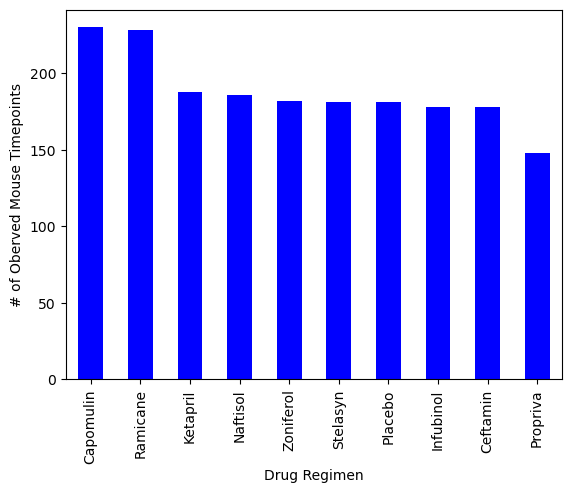

(Drug Regimen
 Capomulin    230
 Ramicane     228
 Ketapril     188
 Naftisol     186
 Zoniferol    182
 Stelasyn     181
 Placebo      181
 Infubinol    178
 Ceftamin     178
 Propriva     148
 Name: count, dtype: int64,
 None)

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_count =combine_data_clean["Drug Regimen"].value_counts()
drug_count.plot(kind='bar',color="blue",xlabel="Drug Regimen",ylabel="# of Oberved Mouse Timepoints")
#plt.xlabel("Drug Regimen")
#plt.ylabel("# of Oberved Mouse Timepoints")
drug_count,plt.show()

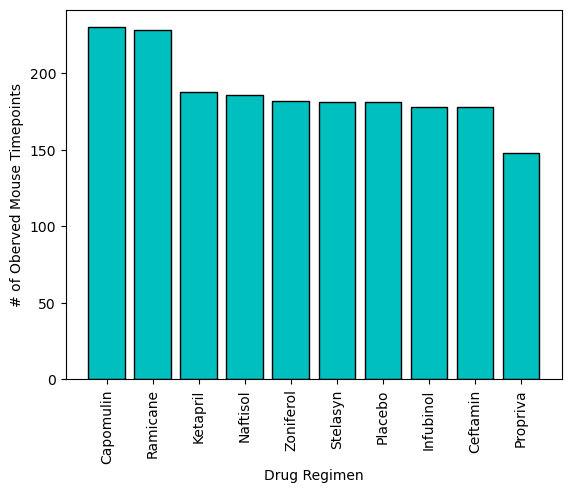

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(drug_count.index.values,drug_count.values, color="c", align="center", edgecolor="black")#color change to defferentiate from bar above
plt.xlabel("Drug Regimen")
plt.ylabel("# of Oberved Mouse Timepoints")
plt.xticks(rotation="vertical")
plt.show()


<Axes: ylabel='count'>

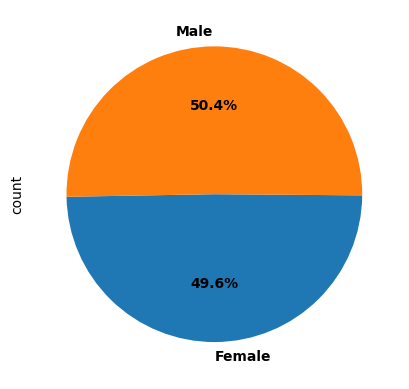

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
count_gender=combine_data_clean.groupby(["Sex"])["Mouse ID"].nunique()

count_gender.plot(kind="pie", ylabel="count", startangle= 181, autopct = "%1.1f%%" , textprops={"weight":"bold"})
#plt.show()


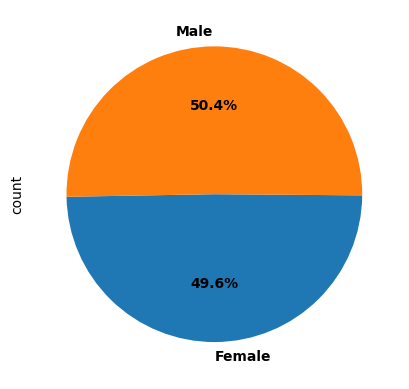

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
#count_gender already filter by unique mice and gender  
# count_gender=combine_data_clean.groupby(["Sex"])["Mouse ID"].nunique()

# Make the pie char
plt.pie(count_gender,labels=count_gender.index, autopct="%1.1f%%", startangle=181,textprops={"weight":"bold"})
plt.ylabel("count")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoints= combine_data_clean.groupby(["Mouse ID"])["Timepoint"].max().reset_index()
max_timepoints
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
#max_tumor = pd.merge(max_timepoints,combine_data_clean, on=["Mouse ID","Timepoint"],how="left" )
max_tumor = max_timepoints.merge(combine_data_clean, on=["Mouse ID","Timepoint"],how="left" )
max_tumor

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list=["Capomulin", "Ramicane", "Infubinol",  "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for Regimen in treatment_list:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    regimen_data = max_tumor.loc[max_tumor["Drug Regimen"] == Regimen, "Tumor Volume (mm3)"]

    # add subset
    tumor_vol.append(regimen_data)
    # Determine outliers using upper and lower bounds
    quartiles= regimen_data.quantile([0.25,0.5,0.75])
    lowerq=quartiles[0.25]
    upperq=quartiles[0.75]
    iqr=upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outlier = regimen_data.loc[(regimen_data < lower_bound) | (regimen_data > upper_bound)]
    


    print(f"{Regimen} regimen data\n"
          f"values below {lower_bound} could be outlier.\n"
          f"Values abouve {upper_bound} could be outlier\n"
          f"The IQR is {iqr}\n"
          f"{Regimen}'s possible number of outlier: {outlier}\n\n"
    )
         




Capomulin regimen data
values below 20.70456164999999 could be outlier.
Values abouve 51.83201549 could be outlier
The IQR is 7.781863460000004
Capomulin's possible number of outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)


Ramicane regimen data
values below 17.912664470000003 could be outlier.
Values abouve 54.30681135 could be outlier
The IQR is 9.098536719999998
Ramicane's possible number of outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)


Infubinol regimen data
values below 36.83290494999999 could be outlier.
Values abouve 82.74144559000001 could be outlier
The IQR is 11.477135160000003
Infubinol's possible number of outlier: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64


Ceftamin regimen data
values below 25.355449580000002 could be outlier.
Values abouve 87.66645829999999 could be outlier
The IQR is 15.577752179999997
Ceftamin's possible number of outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)




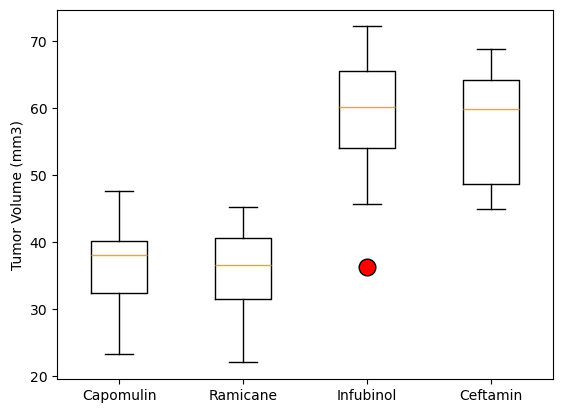

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol, tick_labels=treatment_list ,flierprops=dict(markerfacecolor="red", marker="o", markersize=12),medianprops=dict(color="Orange"))
plt.ylabel("Tumor Volume (mm3)")
plt.show()



## Line and Scatter Plots

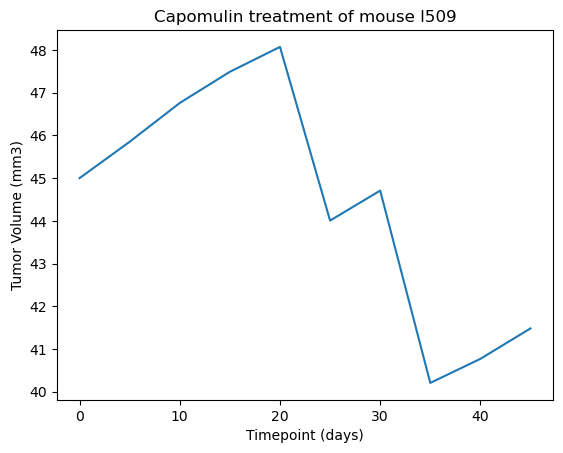

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin = combine_data_clean.loc[combine_data_clean["Drug Regimen"] == "Capomulin"]
#selecting l509 mouse id for the line plot, to parallel the starter code example code
mouse0 ="l509"
mouse0_data = capomulin.loc[capomulin["Mouse ID"]== mouse0]

plt.plot(mouse0_data["Timepoint"],mouse0_data["Tumor Volume (mm3)"] ) 
plt.title(f"{capomulin["Drug Regimen"][0]} treatment of mouse {mouse0}")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

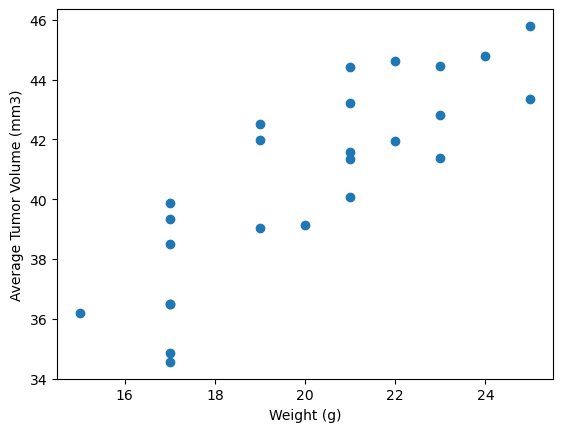

In [54]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# capomulin variable still was the data need for this setting 
avg_data = capomulin.groupby(["Mouse ID"]).agg({"Weight (g)":"first","Tumor Volume (mm3)":"mean"}).reset_index()#using .agg instead of the
#way I did it for sum stat(less coding with .agg)
# leaving default color
plt.scatter(avg_data["Weight (g)"], avg_data["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


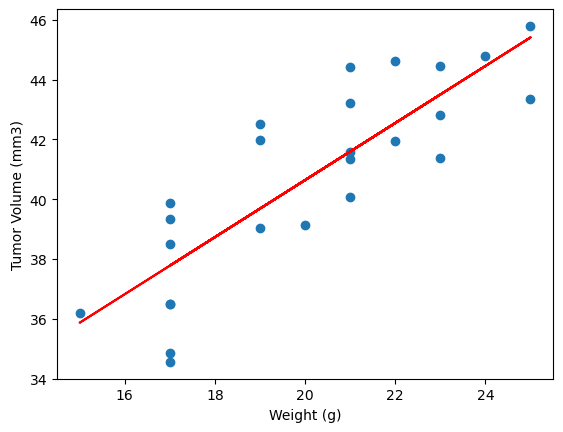

In [67]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = round(st.pearsonr(avg_data["Weight (g)"],avg_data["Tumor Volume (mm3)"])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {correlation}")
#regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_data["Weight (g)"], avg_data["Tumor Volume (mm3)"])
#regression
regression= avg_data["Weight (g)"]  * slope + intercept
plt.scatter(avg_data["Weight (g)"], avg_data["Tumor Volume (mm3)"])
plt.plot(avg_data["Weight (g)"], regression, color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()
